### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Import datasets movies and ratings

In [2]:
ratings=pd.read_csv('ratings.csv')
ratings


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
movies=pd.read_csv('movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


##### Merged both the datasets

In [4]:
df=pd.merge(ratings,movies, on='movieId')
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


### Statistical analysis of ratings

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [6]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [7]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [8]:
ratings_1 = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings_1.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [9]:
ratings_1['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings_1

,rating,num of ratings
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


<Axes: >

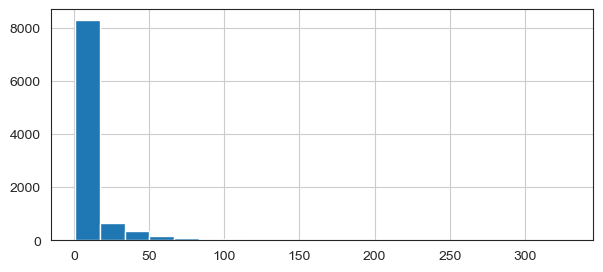

In [10]:
plt.figure(figsize=(7,3))
ratings_1['num of ratings'].hist(bins=20)

<Axes: >

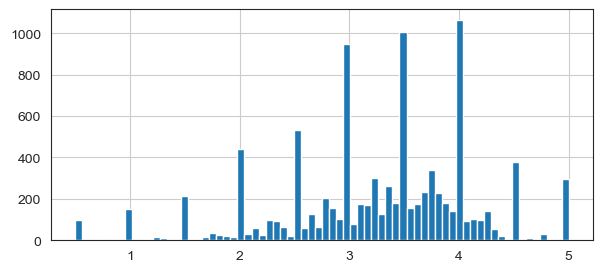

In [11]:
plt.figure(figsize=(7,3))
ratings_1['rating'].hist(bins=70)

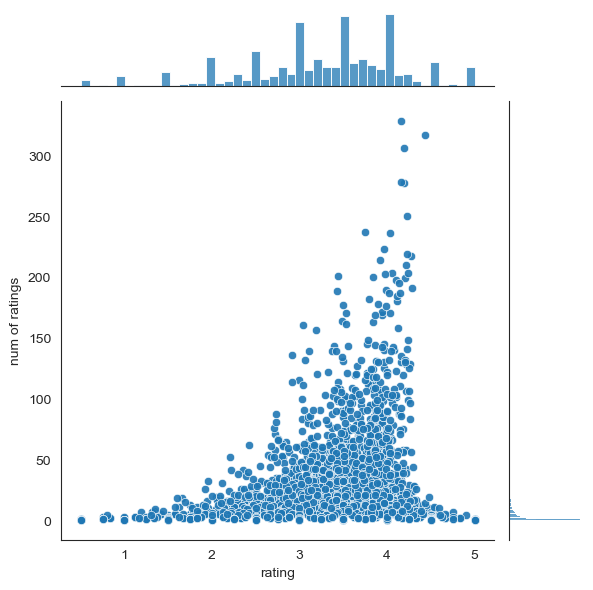

In [12]:
sns.jointplot(x='rating',y='num of ratings',data=ratings_1,alpha=0.9)

### User rating frequency

In [13]:
n_ratings= len(ratings)
print(f"Number of ratings: {n_ratings}")

Number of ratings: 100836


In [14]:
user_freq = df[['userId', 'movieId']].groupby(
    'userId').count().reset_index()
user_freq.columns = ['userId', 'n_ratings']
user_freq.head()

,userId,n_ratings
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44


### Movie rating analysis

In [15]:
mean_rating = df.groupby('movieId')[['rating']].mean()

###### Lowest rated movie

In [16]:
lowest_rated = mean_rating['rating'].idxmin()
movies.loc[movies['movieId'] == lowest_rated]

,movieId,title,genres
2689,3604,Gypsy (1962),Musical


###### Highest rated movie

In [17]:
highest_rated = mean_rating['rating'].idxmax()
movies.loc[movies['movieId'] == highest_rated]

,movieId,title,genres
48,53,Lamerica (1994),Adventure|Drama


###### No.of people who rated movies higest

In [18]:
df[df['movieId']==highest_rated]

,userId,movieId,rating,timestamp,title,genres
86227,85,53,5.0,889468268,Lamerica (1994),Adventure|Drama
86228,603,53,5.0,963180003,Lamerica (1994),Adventure|Drama


###### No.of people who rated movies lowest

In [19]:
df[df['movieId']==lowest_rated]   

,userId,movieId,rating,timestamp,title,genres
86372,89,3604,0.5,1520408880,Gypsy (1962),Musical


### User Item matrix Creation

In [20]:
movies_1=ratings.pivot(index='movieId',columns='userId',values='rating').fillna(0)
movies_1

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from scipy.sparse import csr_matrix 

In [22]:
mat_movies=csr_matrix(movies_1.values)

### Movie Recommendation using Knn

In [23]:
from sklearn.neighbors import NearestNeighbors

In [24]:
model=NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=20)

In [25]:
model.fit(mat_movies)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [26]:
!pip install fuzzywuzzy

In [27]:
from fuzzywuzzy import process

In [28]:
def recommender(movie_name,data,n):
    idx=process.extractOne(movie_name,movies['title'])[2]
    print('Movie Selected : ',movies['title'][idx],'Index : ',idx)
    print('Searching for recommendation.......')
    distance,indices=model.kneighbors(data[idx],n_neighbors=n)
    for i in indices:
        print(movies['title'][i].where(i!=idx))
 

In [29]:
recommender('spider man',mat_movies,10)

Movie Selected :  Spider-Man (2002) Index :  3819
Searching for recommendation.......
3819                                                  NaN
1611                                 Avengers, The (1998)
5564        Riki-Oh: The Story of Ricky (Lik Wong) (1991)
5386                     Christmas with the Kranks (2004)
4703                                     Project X (1987)
5205    Human Condition I, The (Ningen no joken I) (1959)
3546                          Spriggan (Supurigan) (1998)
2858                            Autumn in New York (2000)
3390                                           K-9 (1989)
3941                                    Swarm, The (1978)
Name: title, dtype: object
